# Дослідження магнітних властивостей нанорозмірних феромагнітних плівкових матеріалів

**Мета роботи:** навчитися проводити аналіз результатів дослідження магнітних властивостей нанорозмірних феромагнітних плівкових матеріалів методом SQUID магнітометрії.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Хід виконання роботи

Викладачем надаються вихідні залежності намагніченості від напруженості зовнішнього поля для плівкових зразків $Pt/Fe$ і $Pt/Ag/Fe$ на підкладинках монокристалічного $Al_2O_3$ після різних режимів термічної обробки, а також відповідна залежність самої підкладинки $Al_2O_3$. Значення намагніченості наведені в електромагнітних одиницях (е.м.о.), а напруженості поля – в ерстедах (Ое).

>Досліджувались нанорозмірні плівкові композиції Pt/Fe і Pt/Ag/Fe після відпалів при температурах 600, 700 і 800 градусів Цельсія. Ваша задача - побудувати магнітні криві і температурні залежності магнітних характеристик матеріалів, а також зробити висновок щодо впливу додаткового шару срібла на ці магнітні властивості.

In [2]:
files = sorted(glob.glob('./data/SQIUD/*.txt'))
temperatures = [600, 700, 800]

f_Al2O3 = files[0]
f_PtAgFe = files[1:4]
f_PtFe = files[4:]

З магнітних кривих плівкових зразків вираховується сигнал від підкладинки $Al_2O_3$.

In [3]:
Al2O3 = np.genfromtxt(f_Al2O3, delimiter='\t')
PtFe = np.array([np.genfromtxt(file, delimiter='\t')[:, 1] for file in f_PtFe])
PtAgFe = np.array([np.genfromtxt(file, delimiter='\t')[:, 1] for file in f_PtAgFe])

x = Al2O3[:, 0]
Al2O3 = Al2O3[:, 1]

PtFe = PtFe - Al2O3
PtAgFe = PtAgFe - Al2O3
data = {'PtFe': PtFe, 'PtAgFe': PtAgFe}

Будуються петлі гістерезису плівкових зразків $Pt/Fe$ і $Pt/Ag/Fe$ після різних режимів термічної обробки.

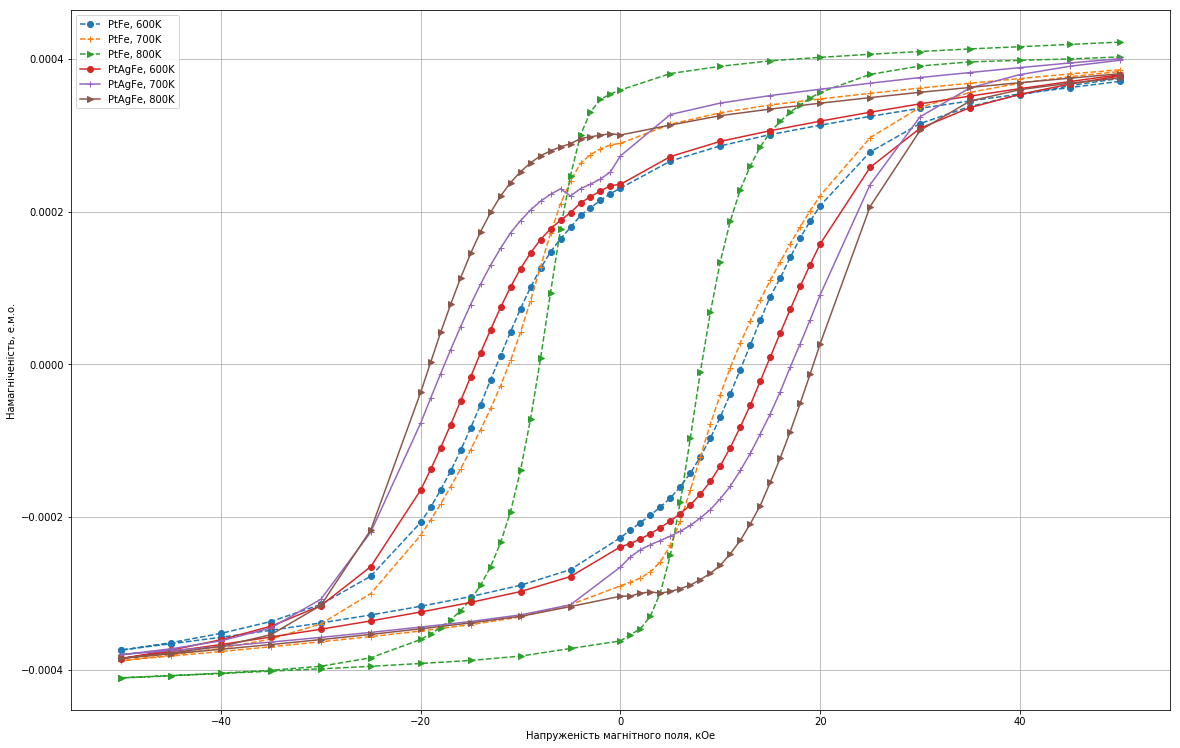

In [6]:
styles = {'PtFe': '--', 'PtAgFe': '-'}
plt.figure(figsize=(16, 10))
for name, sample in data.items():
    markers = iter(['o', '+', '>'])
    for i, T in enumerate(temperatures):
        plt.plot(x, sample[i], next(markers)+styles[name], label=f'{name}, {T}K')
plt.legend()
plt.grid()
plt.tight_layout(0)
plt.ylabel('Намагніченість, е.м.о.')
plt.xlabel('Напруженість магнітного поля, кОе')


plt.savefig('./report/images/hystereticloop.pdf')

Будуються температурні залежності намагніченості насичення, залишкової намагніченості і коерцитивної сили плівкових зразків $Pt/Fe$ і $Pt/Ag/Fe$.

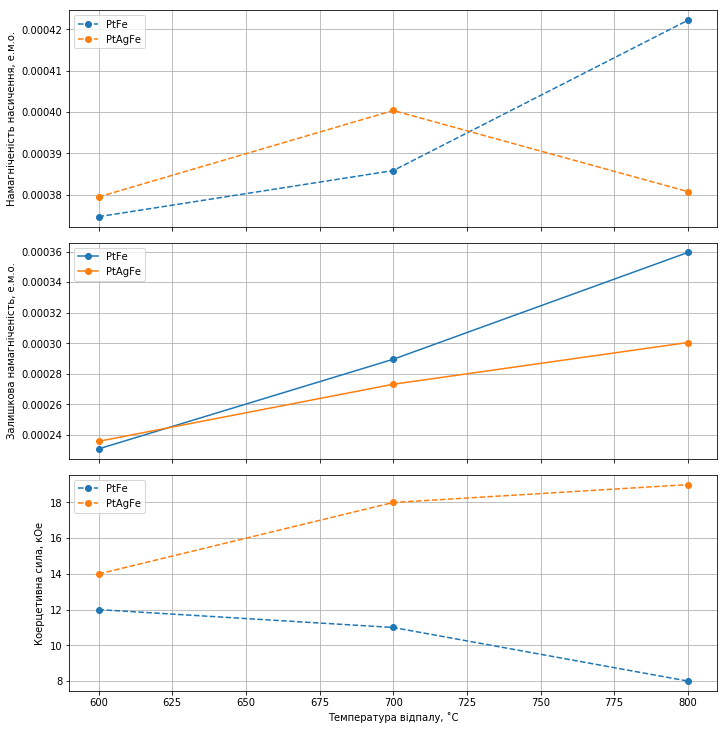

In [22]:
def get_H_c(x, sample, tol):
    y = np.tile(x, 3).reshape(3, -1)[(np.abs(sample) < tol)]
    return np.abs(y[y < 0])

M_s = {name: sample.max(axis=1) for name, sample in data.items()}
M_R = {name: sample[:, np.abs(x) < 1e-2][:, 0] for name, sample in data.items()}
H_c = {name: get_H_c(x, sample, 1.6e-5) for name, sample in data.items()}

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
y_labels = [
    'Намагніченість насичення, е.м.о.',
    'Залишкова намагніченість, е.м.о.',
    'Коерцетивна сила, кОе'
]

for name in M_s.keys():
    m = iter(['o--', 'o-']*3)
    for ax, y, y_label in zip(axes, [M_s, M_R, H_c], y_labels):
        style = next(m)
        ax.plot(temperatures, y[name], style, label=name)
        ax.legend()
        ax.set_ylabel(y_label)
        ax.grid(1)
plt.xlabel('Температура відпалу, ˚C')
plt.tight_layout(0)
plt.savefig('./report/images/lab3.pdf')
plt.show()

Робляться висновки щодо впливу введення додаткового шару $Ag$ на магнітні властивості плівкового матеріалу.

## Висновки

1. У плівковій композиції $Pt/Fe$ намагніченість насичення зростає з підвищенням температури відпалу. Введення додаткового шару $Ag$ призводить до загального збільшення намагніченості насичення в діапазоні температур відпалу 600-700 , при цьому за більших температур відпалу значення спадає.
2. Залишкова намагніченість в діапазоні температур відпалу зростає в обох плівкових композиціях. При цьому тренд крутіший у $Pt/Fe$.
3. У плівковій композиції $Pt/Fe$ зі збільшенням температури відпалу коерцетивна сила спадає. Додавання шару $Ag$ призводить до збільшення в тому ж діапазоні температур відпалу.
